In [59]:
import numpy as np
import pandas as pd
housing = pd.read_csv('housing.csv')

### Taking a quick  look at the picture

In [60]:
housing.head() #viewing first five rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [61]:
housing.info() # description of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [62]:
housing['ocean_proximity'].value_counts() 

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [63]:
housing.describe() # summary of each numerical atribute

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


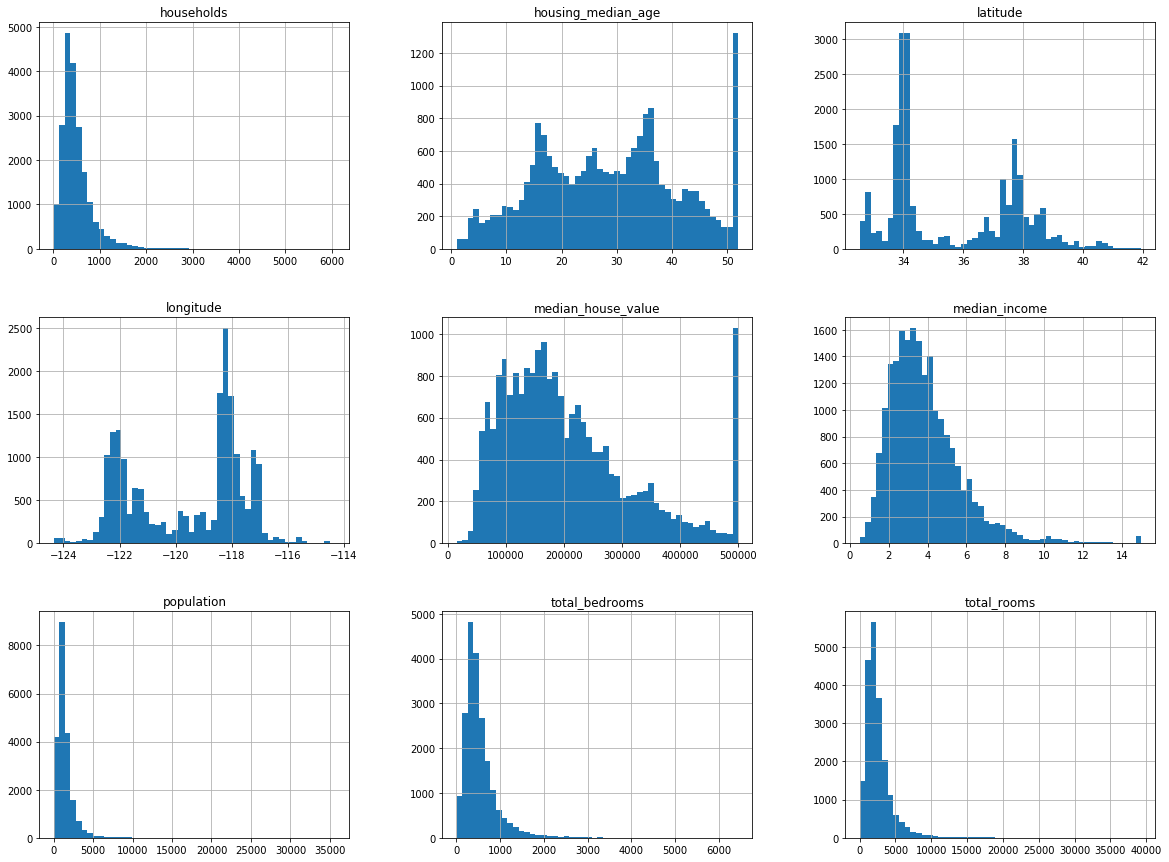

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins = 50,figsize=(20,15))
plt.show()

In [65]:
#categorizing the numerical median_imcome 
housing['income_cat'] = pd.cut(housing['median_income'],
                              bins=[0.,1.5,3.0,4.5,6.,np.inf],
                              labels=[1,2,3,4,5])

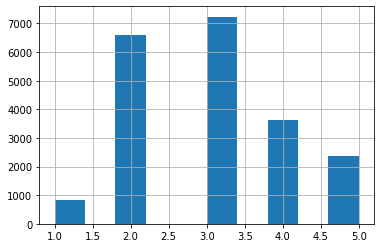

In [66]:
housing['income_cat'].hist()

In [67]:
#assuming the median income plays a significant role in predicting the house value
from sklearn.model_selection import StratifiedShuffleSplit

In [68]:
split = StratifiedShuffleSplit(n_splits =1,test_size=0.2,random_state = 42)
for train_index,test_index in split.split(housing,housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [69]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set) #checking the proportion of each value in the test set

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [70]:
for set_ in (strat_train_set,strat_test_set):
    set_.drop('income_cat', axis=1,inplace=True)

In [71]:
housing = strat_train_set.copy()

### visualizing data

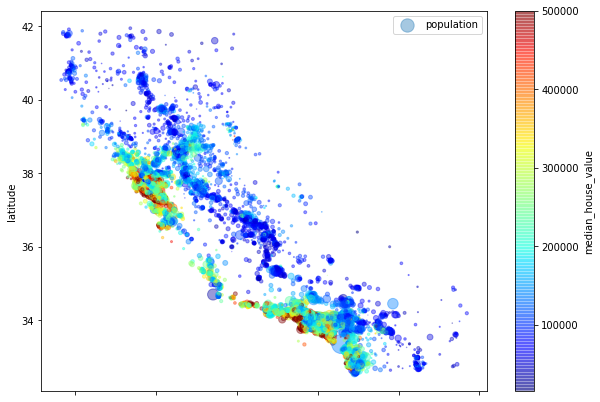

In [72]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,s=housing['population']/100 ,label='population',figsize=(10,7),c='median_house_value',cmap=plt.get_cmap('jet'),colorbar=True)
plt.legend()

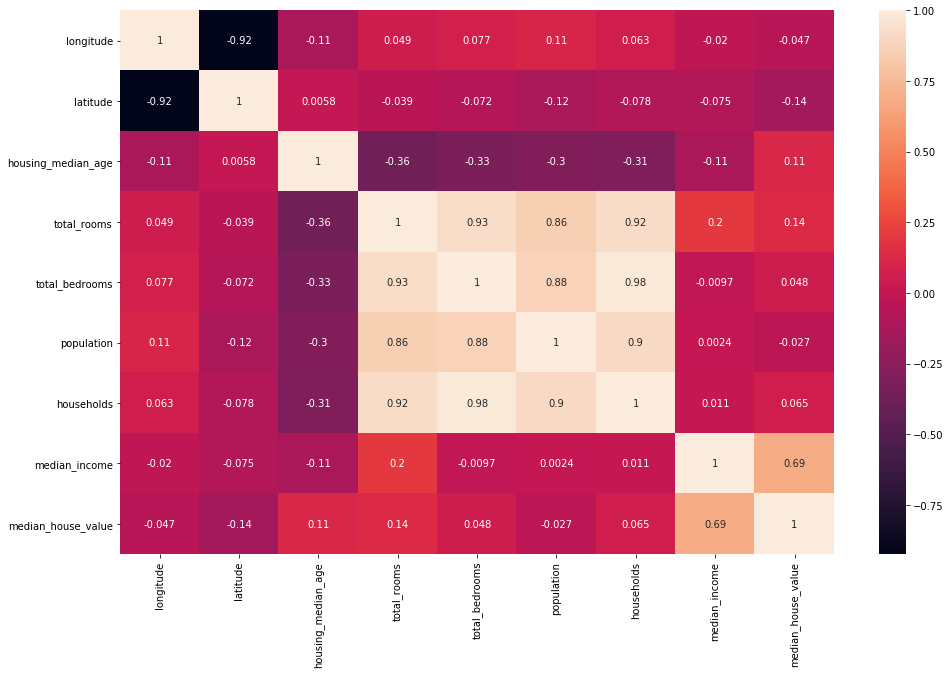

In [73]:
#checking for correlation
import seaborn as sns 
plt.figure(figsize=(16,10))
sns.heatmap(housing.corr(),annot=True)

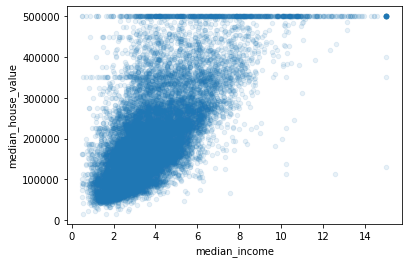

In [74]:
#looking at the median income and median house value more closely
housing.plot(kind="scatter", x="median_income", y="median_house_value",
 alpha=0.1)


In [75]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

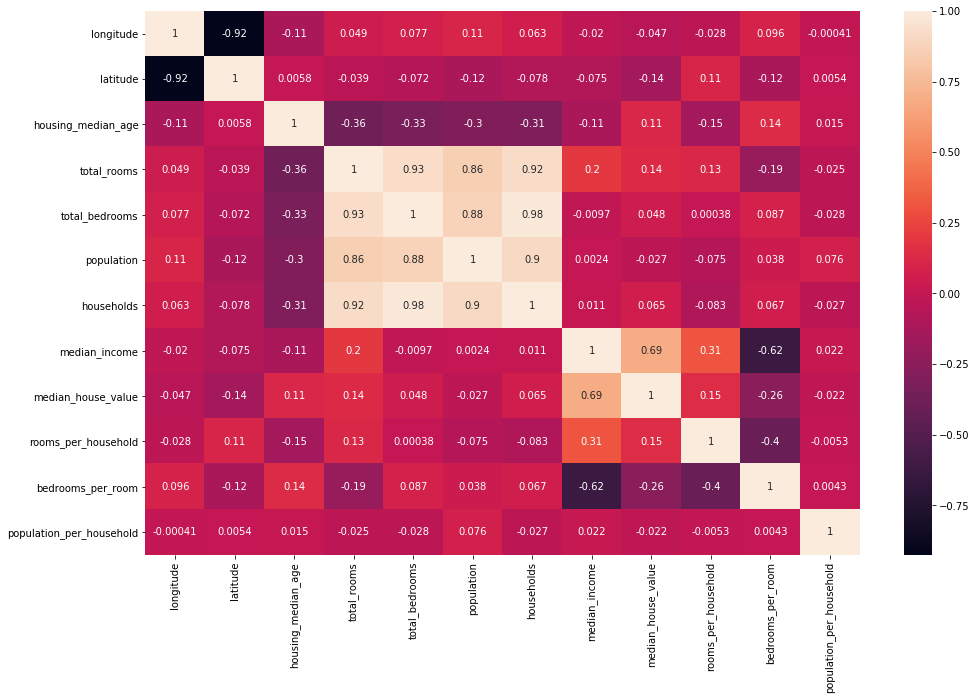

In [76]:
plt.figure(figsize=(16,10))
sns.heatmap(housing.corr(),annot=True)

In [77]:
housing = strat_train_set.drop('median_house_value',axis = 1)
housing_labels = strat_train_set['median_house_value']

### Data Cleaning

In [78]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
housing_num = housing.drop('ocean_proximity',axis=1)

In [79]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [80]:
housing_num.median().values  #checking median  of attributes

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [81]:
X =imputer.transform(housing_num)

In [82]:
housing_tr = pd.DataFrame(X,columns = housing_num.columns)

In [83]:
#converting categorical data to numerical data
housing_cat = housing[['ocean_proximity']]

In [84]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [85]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [86]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [87]:
#customers transformers
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

from sklearn.base import BaseEstimator,TransformerMixin
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):   
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room 
    def fit(self, X, y=None):    
            return self  # nothing else to do  
    def transform(self, X, y=None):    
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]    
        population_per_household = X[:, population_ix] / X[:, households_ix]   
        if self.add_bedrooms_per_room:            
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]       
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]  
        else:        
            return np.c_[X, rooms_per_household, population_per_household]


### Feature Scaling

In [88]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('imputer',SimpleImputer(strategy='median')),
                         ('attribs_adder',CombinedAttributesAdder()),
                        ('std_scaler',StandardScaler())])

In [89]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [99]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']


In [100]:
full_pipeline = ColumnTransformer([('num',num_pipeline,num_attribs),
                                  ('cat',OneHotEncoder(),cat_attribs)])

housing_prepared = full_pipeline.fit_transform(housing)


### Selecting And Training A Model

In [102]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [107]:
#trying the model 
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print('predictions:', lin_reg.predict(some_data_prepared))
print('labels',list(some_labels))

predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
labels [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [109]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

In [111]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [113]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels,housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

### Evaluation Using Cross-Validation

In [117]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [118]:
def display_scores(scores):
    print('scores: ',scores)
    print('mean: ',scores.mean())
    print('Standard deviation: ',scores.std())

In [119]:
display_scores(tree_rmse_scores)

scores:  [68375.24192919 66656.20729525 71167.81381181 69456.27000613
 71489.26007056 73928.12976209 70573.93846418 70688.34203729
 77685.27898339 70252.34099609]
mean:  71027.28233559837
Standard deviation:  2872.379466806969


In [120]:
lin_scores = cross_val_score(lin_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error')

In [123]:
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

scores:  [66905.27341781 72625.99907174 69644.38266971 66634.37714533
 69750.37344436]
mean:  69112.08114978828
Standard deviation:  2193.05260416845


In [125]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels,housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse


18696.063079676147

In [128]:
forest_scores = cross_val_score(forest_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

scores:  [49835.72625185 47513.41673677 49849.47845601 52498.20843416
 50080.7193067  53356.67544849 48830.0037564  47885.64469314
 52857.03498584 50237.6310829 ]
mean:  50294.45391522662
Standard deviation:  1921.9533269988435


### Fine Tune The Model

In [129]:
from sklearn.model_selection import GridSearchCV


In [130]:
param_grid = [{'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
             {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]}]

In [133]:
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)

In [141]:
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [142]:
grid_search.best_params_


{'max_features': 6, 'n_estimators': 30}

In [148]:
cvres  = grid_search.cv_results_

In [151]:
for mean_test_score,params in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean_test_score),params)
    

64211.2915911529 {'max_features': 2, 'n_estimators': 3}
55351.54253177347 {'max_features': 2, 'n_estimators': 10}
53154.03028382013 {'max_features': 2, 'n_estimators': 30}
60563.808009540146 {'max_features': 4, 'n_estimators': 3}
53100.52624946466 {'max_features': 4, 'n_estimators': 10}
50619.68119782721 {'max_features': 4, 'n_estimators': 30}
59586.29846424701 {'max_features': 6, 'n_estimators': 3}
52064.190775399096 {'max_features': 6, 'n_estimators': 10}
50014.098595171614 {'max_features': 6, 'n_estimators': 30}
59280.777005507356 {'max_features': 8, 'n_estimators': 3}
51998.49568704615 {'max_features': 8, 'n_estimators': 10}
50138.60943001733 {'max_features': 8, 'n_estimators': 30}
62311.52262061151 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54171.703926068076 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60834.29348932727 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52493.240841507395 {'bootstrap': False, 'max_features': 3, 'n_estimators

### Evaluate On The Test Set

In [152]:
final_model = grid_search.best_estimator_

In [155]:
X_test = strat_test_set.drop('median_house_value',axis=1)
y_test = strat_test_set['median_house_value'].copy()

In [156]:
X_test_prepared = full_pipeline.transform(X_test)

In [158]:
final_predictions = final_model.predict(X_test_prepared)

In [159]:
final_mse = mean_squared_error(y_test,final_predictions)

In [160]:
final_rmse = np.sqrt(final_mse)

In [161]:
final_rmse


47523.18598723935